In [1]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from preprocessing import preprocess, get_labels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import marimo as mo

In [4]:
df = pd.read_csv("../../data/train_data.csv", index_col=0)
X = preprocess(df, attr=[])
y = get_labels(df)

# Feature Selection
We want to discover which features have relationships with the ground truth.  We use mutual information to do so.  Mutual information quantifies how much knowing the value of one columns lets you know the value of another.  In this case higher is better.

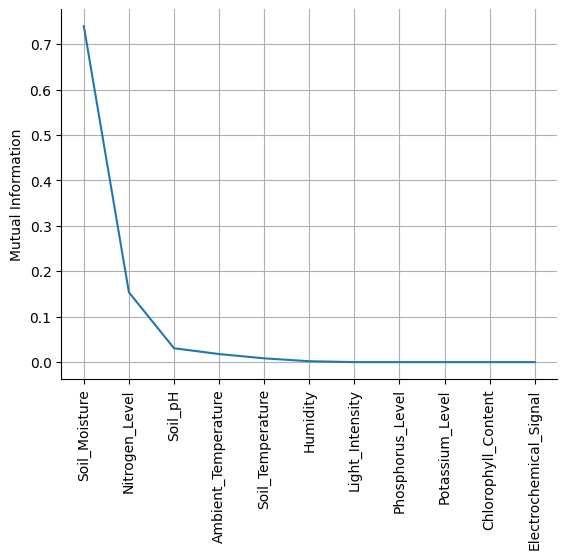

In [5]:
scores = mutual_info_classif(X,y.values.flatten())
scores = pd.Series(index=X.columns, data=scores)
sns.lineplot(
    scores.sort_values(ascending=False),
)
sns.despine()
plt.grid(True)
plt.xticks(rotation = 90)
plt.ylabel("Mutual Information")
plt.show()

Soil Moisture has a high mutual information with the class labels.  But almost none of the other features correspond with the class labels. 
We kepth the features with more than 0 mutual information with the class labels

In [10]:
f"The Features we chose to keep are [{",".join(scores[scores > 0].index.tolist())}]"

'The Features we chose to keep are [Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Soil_pH,Nitrogen_Level]'